# A General Framework for Linear Models

In [1]:
import sympy
from sympy import init_printing
import numpy as np
from numpy.linalg import inv

init_printing()
np.set_printoptions(precision=3, suppress=True)

A simple enlightment on the fact that
$$
    \Phi^T \Phi = \sum_{i=1}^{N} \phi(x_i) \phi(x_i)^T
$$

Consider
* $\Phi \in \mathbb{R}^{N\times M}$
* $\phi(x_i) \in \mathbb{R}^{M\times 1}$

Where
$$
    \Phi = \begin{bmatrix} \phi(x_1)^T \\ \vdots \\ \phi(x_N)^T \end{bmatrix}
$$

Thus,

$$
    \Phi^T\Phi = \begin{bmatrix} \phi(x_1) & \ldots & \phi(x_N) \end{bmatrix} \begin{bmatrix} \phi(x_1)^T \\ \vdots \\ \phi(x_N)^T \end{bmatrix} = \sum_{i=1}^{N} \phi(x_i) \phi(x_i)^T
$$

### An Example

In [2]:
phi_01 = sympy.symbols("\phi_{0}(x_1)")
phi_02 = sympy.symbols("\phi_{0}(x_2)")

phi_11 = sympy.symbols("\phi_{1}(x_1)")
phi_12 = sympy.symbols("\phi_{1}(x_2)")

phi_21 = sympy.symbols("\phi_{2}(x_1)")
phi_22 = sympy.symbols("\phi_{2}(x_2)")

In [21]:
Phi = sympy.Matrix([
    [phi_01, phi_02],
    [phi_11, phi_12],
    [phi_21, phi_22]
])

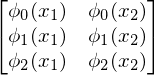

In [22]:
# N: number of datapoints
# M: number of basis functions
Phi

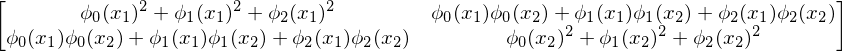

In [23]:
E1 = Phi.T @ Phi
E1

In [6]:
phi_0 = sympy.Matrix([[phi_01, phi_02]]).T
phi_1 = sympy.Matrix([[phi_11, phi_12]]).T
phi_2 = sympy.Matrix([[phi_21, phi_22]]).T

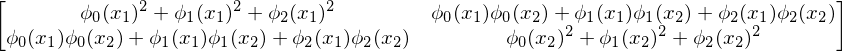

In [7]:
E2 = phi_0 @ phi_0.T + phi_1 @ phi_1.T + phi_2 @ phi_2.T
E2

In [8]:
E1 == E2

True

## Geometrical Representation for least squares

In [9]:
def pseudoinverse(phi):
    return inv(phi.T @ phi) @ phi.T

In [13]:
N, M = 7, 5
Phi = np.random.randn(N, M)
Phi @ pseudoinverse(Phi)

array([[ 0.94 ,  0.044,  0.128, -0.099,  0.017,  0.061,  0.155],
       [ 0.044,  0.803, -0.039,  0.023, -0.317, -0.229, -0.037],
       [ 0.128, -0.039,  0.707,  0.228,  0.063, -0.07 , -0.358],
       [-0.099,  0.023,  0.228,  0.822, -0.062,  0.046,  0.279],
       [ 0.017, -0.317,  0.063, -0.062,  0.433, -0.357,  0.096],
       [ 0.061, -0.229, -0.07 ,  0.046, -0.357,  0.733, -0.073],
       [ 0.155, -0.037, -0.358,  0.279,  0.096, -0.073,  0.561]])

In [14]:
v = np.array([2, 1, 4, 1, 5, 7, 1]).reshape(-1, 1)
v

array([[2],
       [1],
       [4],
       [1],
       [5],
       [7],
       [1]])

In [15]:
Phi @ pseudoinverse(Phi) @ v

array([[ 3.006],
       [-2.467],
       [ 2.743],
       [ 1.852],
       [-0.328],
       [ 2.932],
       [-0.349]])

## Multiple Outputs

In [16]:
w11, w12, w21, w22 = sympy.symbols("w_{11}, w_{12}, w_{21}, w_{22}")
x1, x2 = sympy.symbols("x_1 x_2")

W = sympy.Matrix([
    [w11, w12],
    [w21, w22]
])
x = sympy.Matrix([[x1, x2]]).T

In [17]:
((W.T @ x).T @ (W.T @ x))[0]

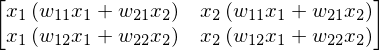

In [18]:
(W.T @ x) @ x.T